In [1]:
import sys
sys.path.append("..")

Auto reload the packages when they are modified.

In [2]:
# for auto-reload
%load_ext autoreload
%aimport predictions.models
%aimport agents
%autoreload 1

## Import Required Libraries

In [3]:
from agents.des_agent import DESAgent as Agent
from predictions.models.des import DES

import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

2024-03-03 21:11:57.179856: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-03 21:11:57.181262: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-03 21:11:57.204559: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 21:11:57.204584: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 21:11:57.205281: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [4]:
df = pd.read_csv('../../data/bitcoin/price/bitcoin_chart.csv')
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df = df[(df['Date'] >= datetime.strptime('2022-01-01', '%Y-%m-%d').date()) & (df['Date'] < datetime.strptime('2023-01-01', '%Y-%m-%d').date())]
df

,Timestamp,Price,Market_Cap,Total_Volume,Date
3168,2022-01-01 00:00:00.000,46319.651088,8.761929e+11,2.589535e+10,2022-01-01
3169,2022-01-02 00:00:00.000,47816.077676,9.045519e+11,1.890459e+10,2022-01-02
3170,2022-01-03 00:00:00.000,47387.212168,8.975361e+11,3.375613e+10,2022-01-03
3171,2022-01-04 00:00:00.000,46531.140861,8.803302e+11,2.189002e+10,2022-01-04
3172,2022-01-05 00:00:00.000,45938.024272,8.762427e+11,2.489599e+10,2022-01-05
...,...,...,...,...,...
3528,2022-12-27 00:00:00.000,16900.081872,3.250369e+11,1.257500e+10,2022-12-27
3529,2022-12-28 00:00:00.000,16701.840211,3.213515e+11,1.743606e+10,2022-12-28
3530,2022-12-29 00:00:00.000,16538.906094,3.182889e+11,1.911361e+10,2022-12-29
3531,2022-12-30 00:00:00.000,16644.379087,3.202973e+11,1.568373e+10,2022-12-30


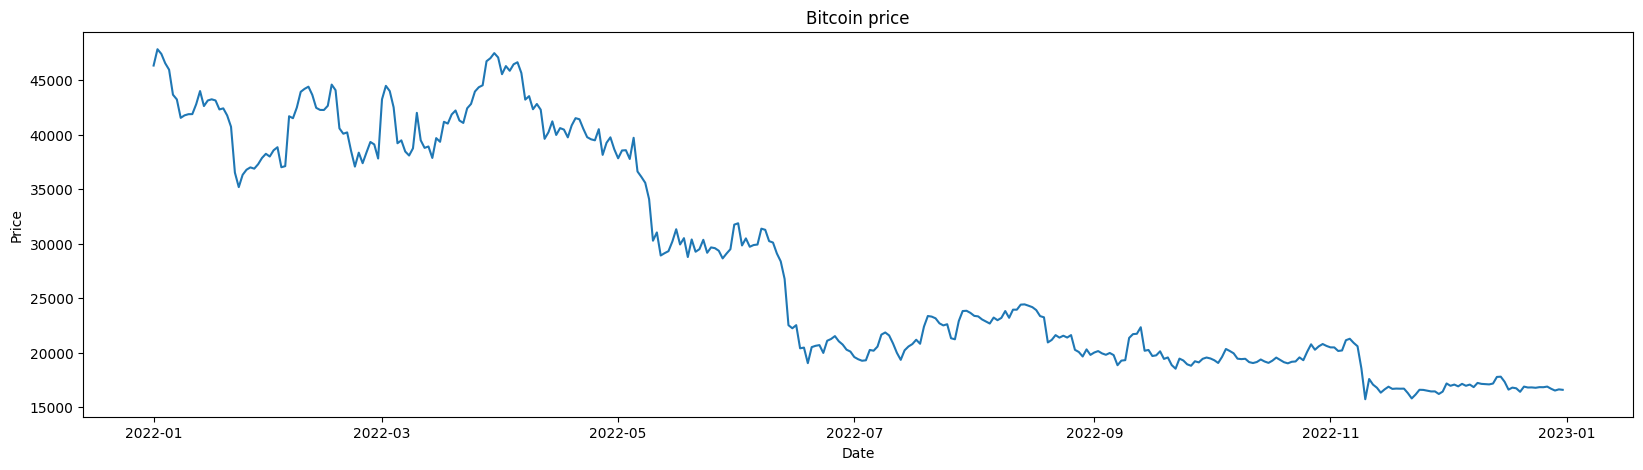

In [5]:
# plot the df with the price and the date
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin price')
plt.show()

In [6]:
data_points = df["Price"].values.tolist()
window_size = 30
skip = 1

In [7]:
model = DES(window_size, 500, 3)
agent = Agent(model, 100, 5, 5, data_points, window_size, skip)
agent.train_test_split(test_size=0.2)
agent.fit(10, 1)

2024-03-03 21:11:58.679316: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-03 21:11:58.679500: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


iter 1. reward: -6.384308
iter 2. reward: -7.540596
iter 3. reward: -15.176910


KeyboardInterrupt: 

In [ ]:
agent.buy()